In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

In [3]:
train_dir = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'
test_dir = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test'

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, width_shift_range = 0.1, height_shift_range = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [6]:
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.activations import softmax

In [7]:
base_model=tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_tensor=None,input_shape=(224,224,3),pooling=None)

58889256/58889256 [==============================] - 2s 0us/step


In [8]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create your model
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Compile the model
optimizer = Adam(lr=0.0001, decay=1e-5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=test_generator, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 9s 1s/step - loss: 0.3956 - accuracy: 0.7838 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 2/15
5/5 [==============================] - 6s 1s/step - loss: 0.1826 - accuracy: 0.9257 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 3/15
5/5 [==============================] - 5s 1s/step - loss: 0.1415 - accuracy: 0.9257 - val_loss: 0.1209 - val_accuracy: 0.9500
Epoch 4/15
5/5 [==============================] - 6s 1s/step - loss: 0.1043 - accuracy: 0.9527 - val_loss: 0.2281 - val_accuracy: 0.9500
Epoch 5/15
5/5 [==============================] - 6s 1s/step - loss: 0.0856 - accuracy: 0.9730 - val_loss: 0.1664 - val_accuracy: 0.9250
Epoch 6/15
5/5 [==============================] - 6s 1s/step - loss: 0.4651 - accuracy: 0.9459 - val_loss: 0.0957 - val_accuracy: 0.9750
Epoch 7/15
5/5 [==============================] - 6s 1s/step - loss: 0.2227 - accuracy: 0.9595 - val_loss: 0.0250 - val_accuracy: 0.9750
Epoch 8/15
5/5 [=========================

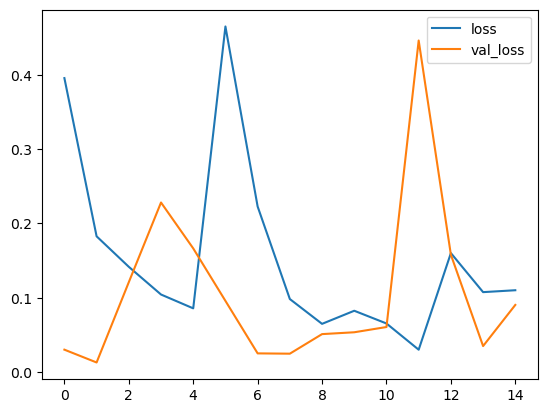

In [11]:
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()

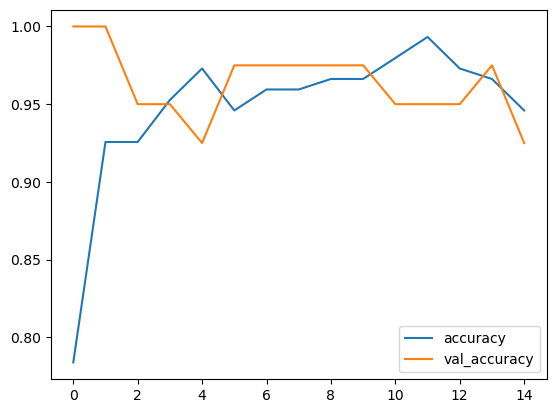

In [12]:
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.legend()